In [1]:
# Name: Dhruv Kumar
# Roll No.: 24419CMP011
# Course: M.Sc. Computer Science
# Semester: 2nd

Maximum Embeddable Bits: 50400
Embedding Peak: 220, Zero: 253
PSNR between Original and Marked image: 56.28 dB
PSNR between Original and Recovered image: 78.17 dB
Data Extraction Accuracy: 100.00%


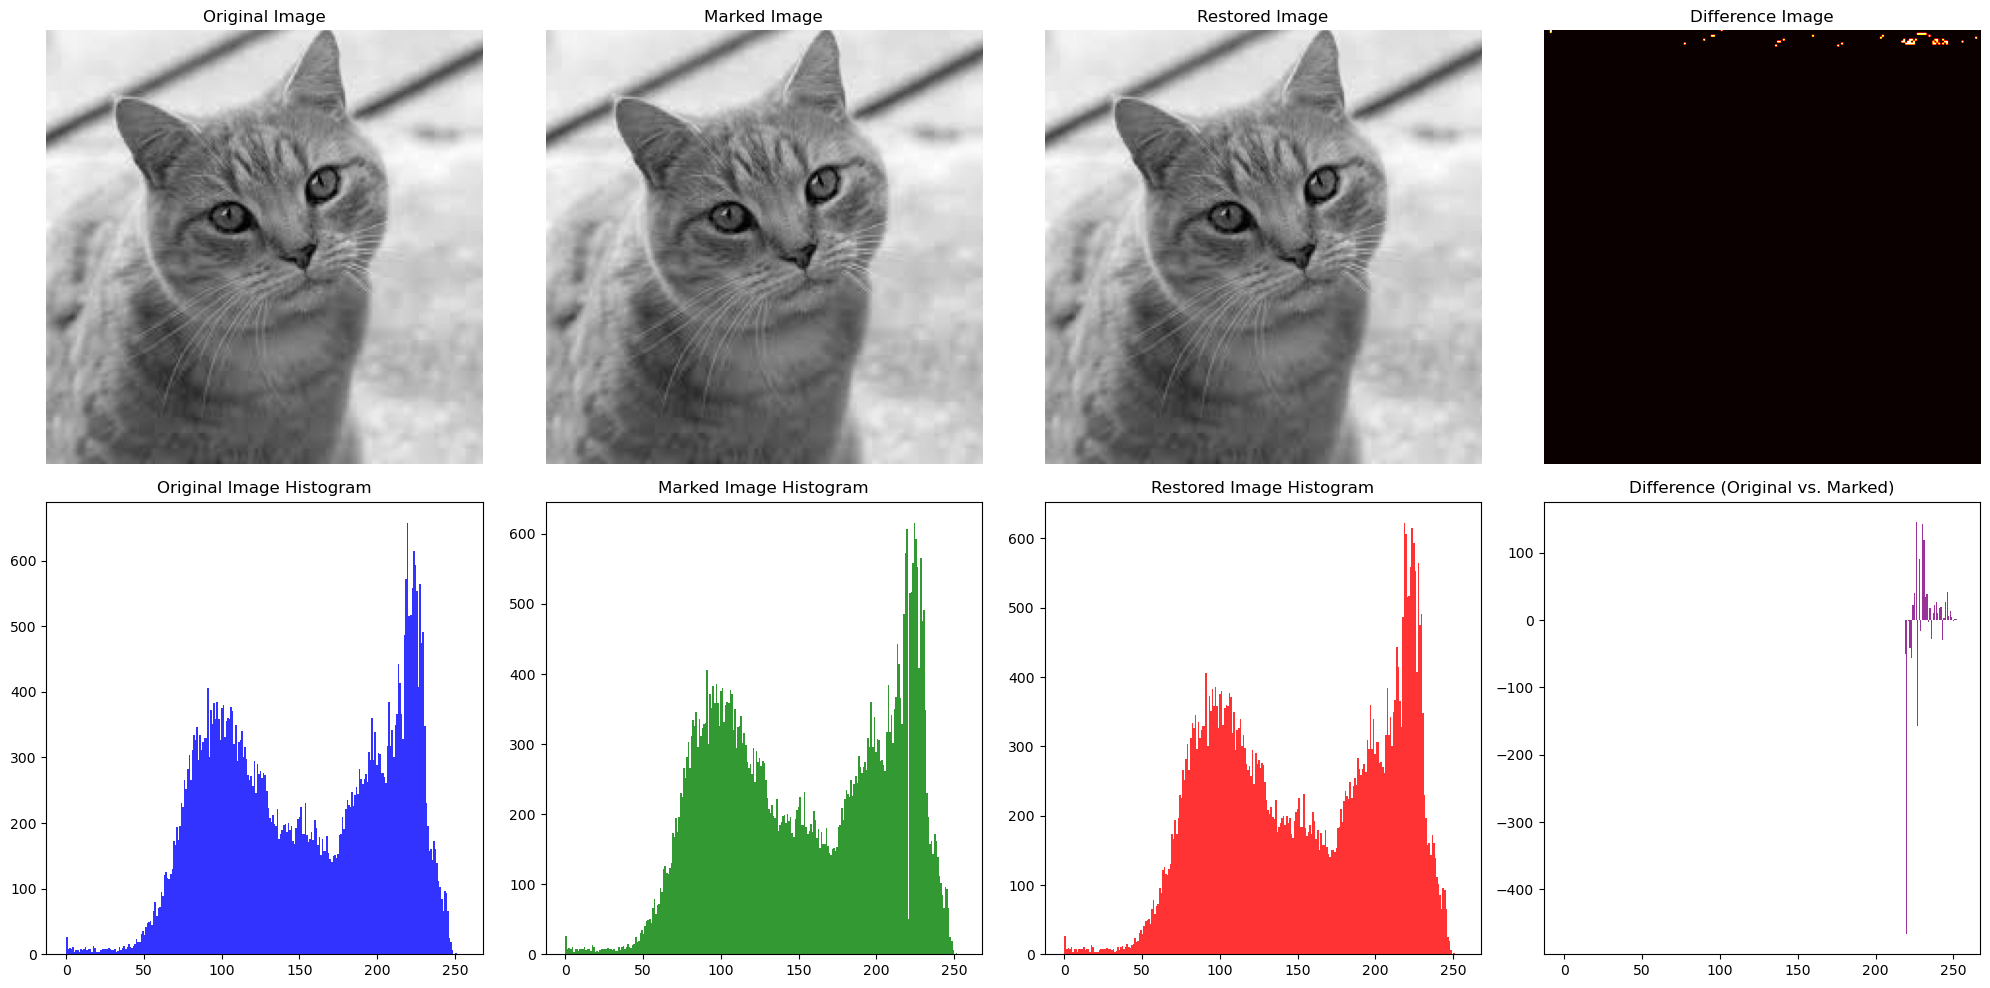

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def psnr(original, modified):
    mse = np.mean((original - modified) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def embed_data(image, data):
    histogram, _ = np.histogram(image, bins=256, range=(0, 255))
    peak_point = np.argmax(histogram)

    zero_bins = np.where(histogram == 0)[0]
    if len(zero_bins) > 0:
        zero_point = zero_bins[0]
    else:
        zero_point = 255

    marked_image = np.copy(image)
    shift_range = range(peak_point + 1, zero_point + 1)
    for value in shift_range:
        marked_image[image == value] += 1

    data_index = 0
    embedded_pixels = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] == peak_point and data_index < len(data):
                if data[data_index] == 1:
                    marked_image[i, j] += 1
                data_index += 1
                embedded_pixels.append((i, j))

    overhead_info = (peak_point, zero_point, len(embedded_pixels))
    return marked_image, overhead_info, embedded_pixels

def extract_data(marked_image, overhead_info, embedded_pixels):
    peak_point, zero_point, _ = overhead_info
    extracted_data = []
    restored_image = np.copy(marked_image)

    for i, j in embedded_pixels:
        if marked_image[i, j] == peak_point + 1:
            extracted_data.append(1)
            restored_image[i, j] -= 1
        elif marked_image[i, j] == peak_point:
            extracted_data.append(0)

    shift_range = range(zero_point, peak_point, -1)
    for value in shift_range:
        restored_image[marked_image == value] -= 1

    return extracted_data, restored_image

if __name__ == "__main__":
    image = cv2.imread('D:\\Code\\cat.jpeg', cv2.IMREAD_GRAYSCALE)
    data = np.random.randint(0, 2, size=100).tolist()

    marked_image, overhead_info, embedded_pixels = embed_data(image, data)
    extracted_data, restored_image = extract_data(marked_image, overhead_info, embedded_pixels)

    psnr_marked = psnr(image, marked_image)
    psnr_restored = psnr(image, restored_image)

    accuracy = np.sum(np.array(data) == np.array(extracted_data)) / len(data)
    max_embeddable_bits = marked_image.size

    print("Maximum Embeddable Bits:", max_embeddable_bits)
    print(f"Embedding Peak: {overhead_info[0]}, Zero: {overhead_info[1]}")
    print(f"PSNR between Original and Marked image: {psnr_marked:.2f} dB")
    print(f"PSNR between Original and Recovered image: {psnr_restored:.2f} dB")
    print(f"Data Extraction Accuracy: {accuracy * 100:.2f}%")

    plt.figure(figsize=(20, 10))

    plt.subplot(2, 4, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title("Marked Image")
    plt.imshow(marked_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.title("Restored Image")
    plt.imshow(restored_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title("Difference Image")
    difference_image = cv2.absdiff(image, restored_image)
    plt.imshow(difference_image, cmap='hot')
    plt.axis('off')

    plt.subplot(2, 4, 5)
    plt.title("Original Image Histogram")
    plt.hist(image.flatten(), bins=256, range=(0, 255), color='blue', alpha=0.8)

    plt.subplot(2, 4, 6)
    plt.title("Marked Image Histogram")
    plt.hist(marked_image.flatten(), bins=256, range=(0, 255), color='green', alpha=0.8)

    plt.subplot(2, 4, 7)
    plt.title("Restored Image Histogram")
    plt.hist(restored_image.flatten(), bins=256, range=(0, 255), color='red', alpha=0.8)

    plt.subplot(2, 4, 8)
    plt.title("Difference (Original vs. Marked)")
    original_hist, bins = np.histogram(image, bins=256, range=(0, 255))
    marked_hist, _ = np.histogram(marked_image, bins=256, range=(0, 255))
    difference = marked_hist - original_hist
    plt.bar(bins[:-1], difference, color='purple', alpha=0.8)

    plt.tight_layout()
    plt.show()